In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
# Load data from CSV
df = pd.read_csv('cleaned_school_data.csv')
df.replace('z', np.nan, inplace=True) # replace the z to NAN in avg_progress8_score
# Convert columns to numeric
numeric_columns = ['total_num_schools', 'total_num_pupils', 'avg_attainment8_score', 'avg_progress8_score', 'perc_achieving_grade_5to9_eng_maths']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

# Comparing average scores for boys vs girls

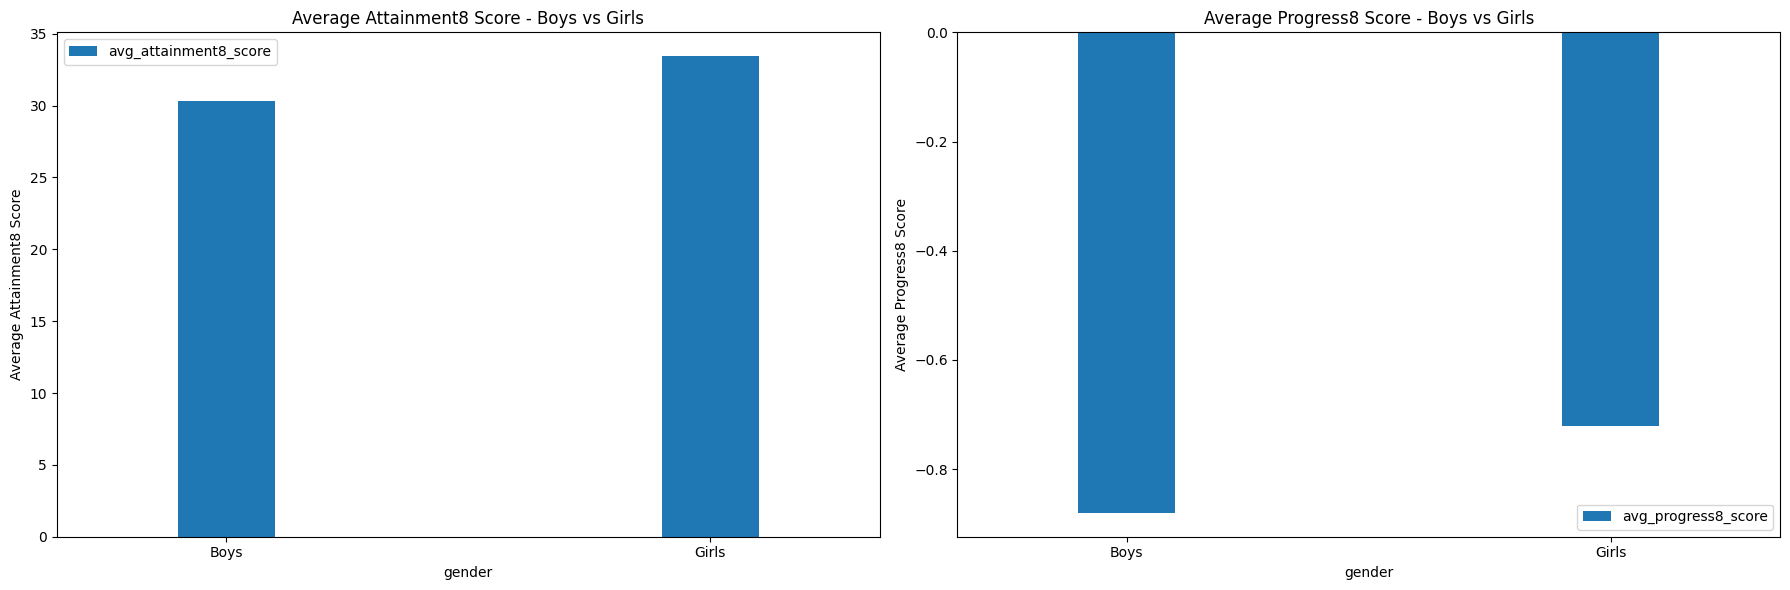

In [81]:
# Filter gender rows
df_gender = df[df['gender'].isin(['Boys', 'Girls'])]

# Group by gender and calculate average scores
avg_scores_gender = df_gender.groupby(['gender']).agg({
    'avg_attainment8_score': 'mean',
    'avg_progress8_score': 'mean'
}).reset_index()

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Average Attainment8 Score
avg_scores_gender.plot(kind='bar', x='gender', y='avg_attainment8_score', ax=axes[0], position=0.5, width=0.2, rot=0)
axes[0].set_title('Average Attainment8 Score - Boys vs Girls')
axes[0].set_ylabel('Average Attainment8 Score')

# Average Progress8 Score
avg_scores_gender.plot(kind='bar', x='gender', y='avg_progress8_score', ax=axes[1], position=0.5, width=0.2,  rot=0)
axes[1].set_title('Average Progress8 Score - Boys vs Girls')
axes[1].set_ylabel('Average Progress8 Score')

plt.tight_layout()
plt.show()


# Comparing average scores for all schools

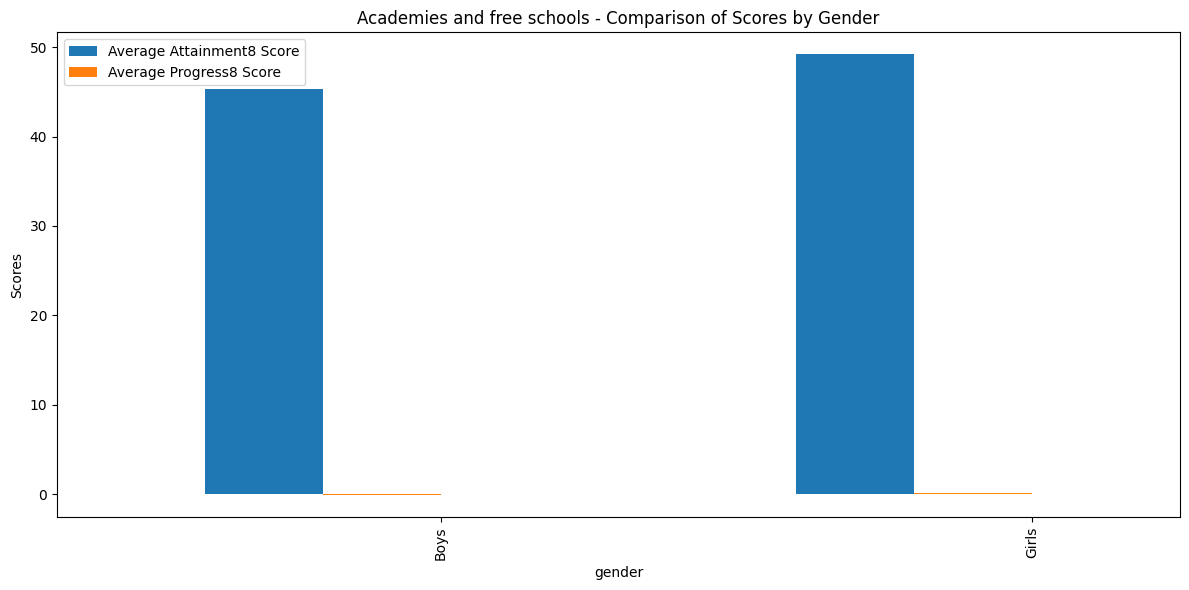

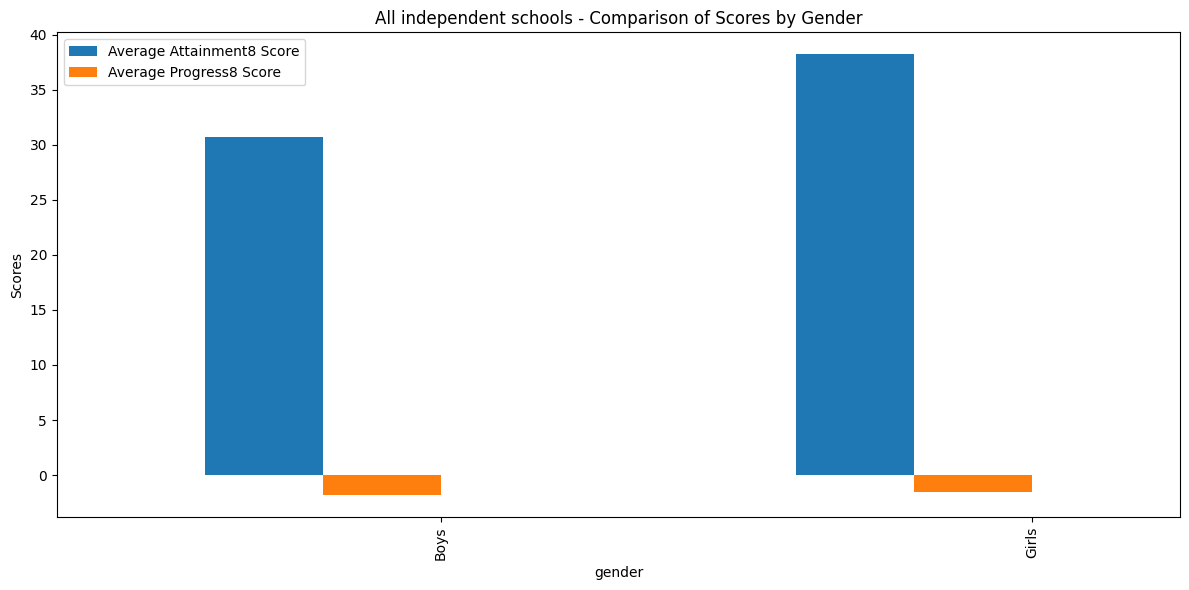

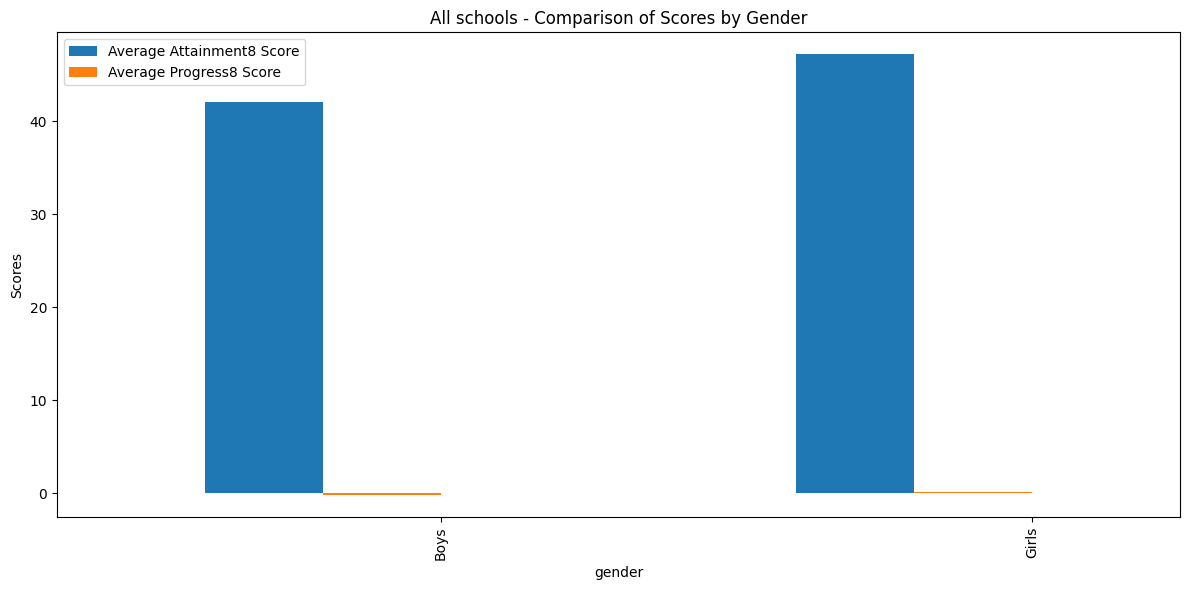

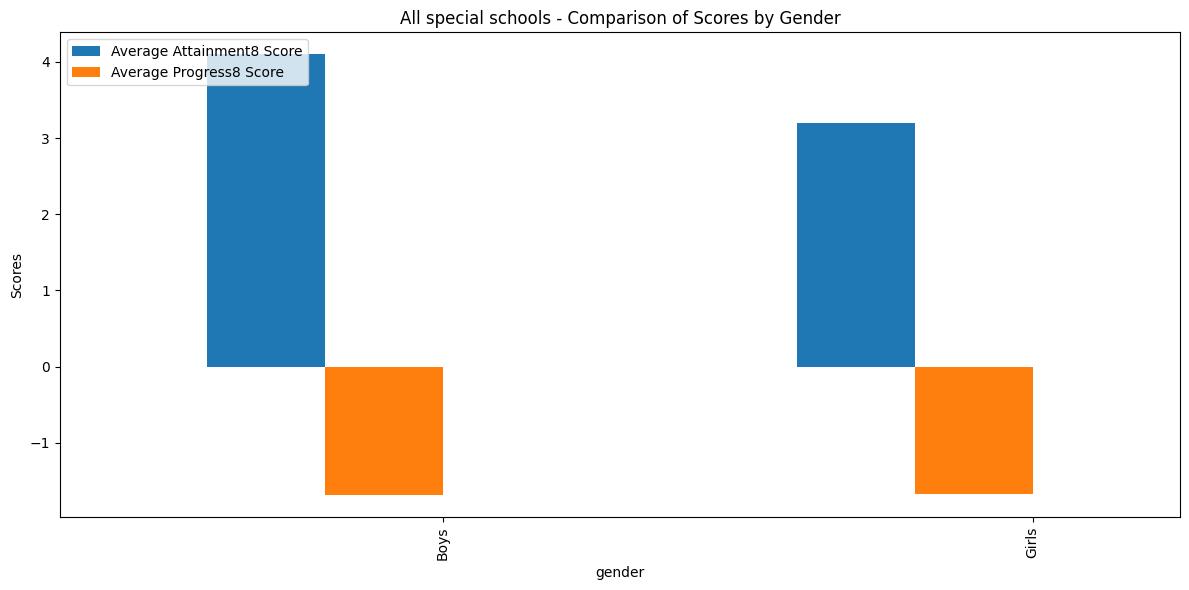

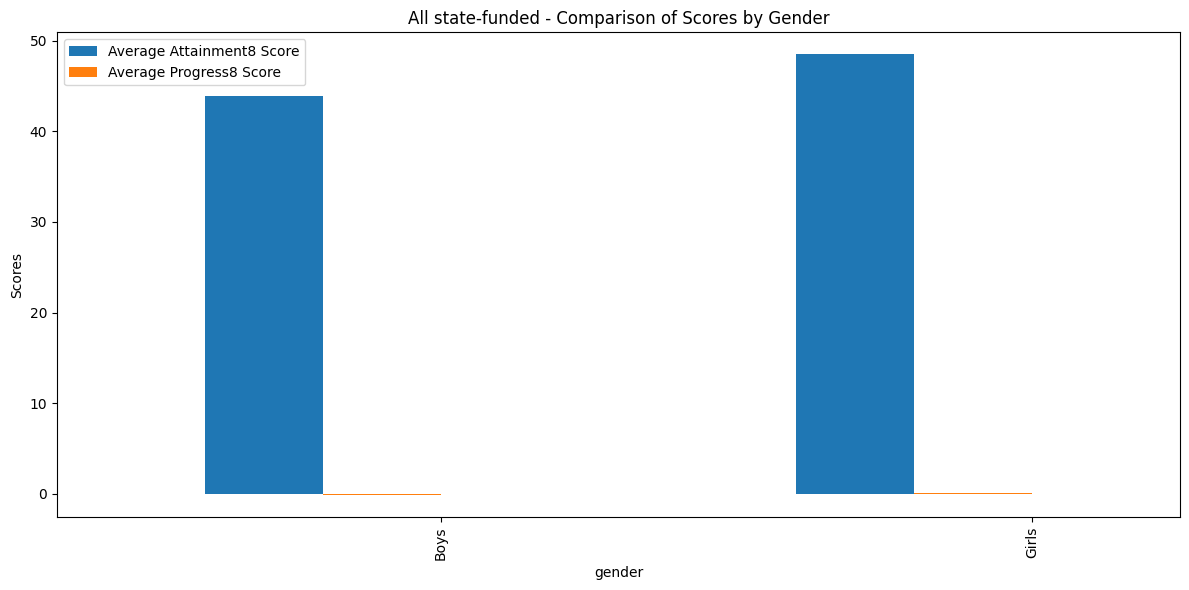

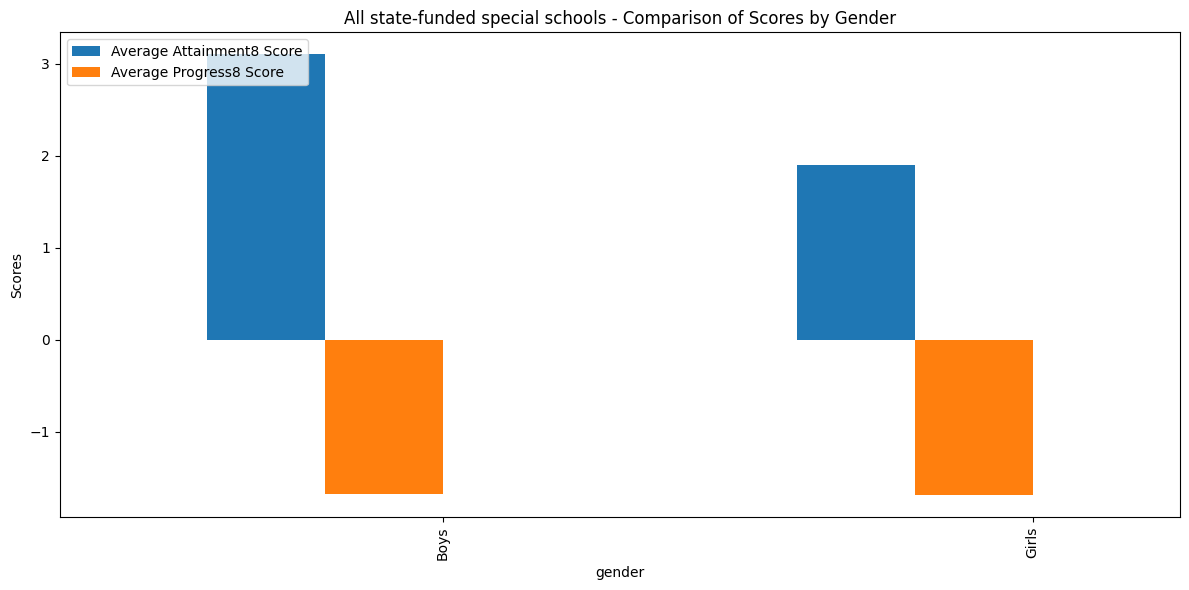

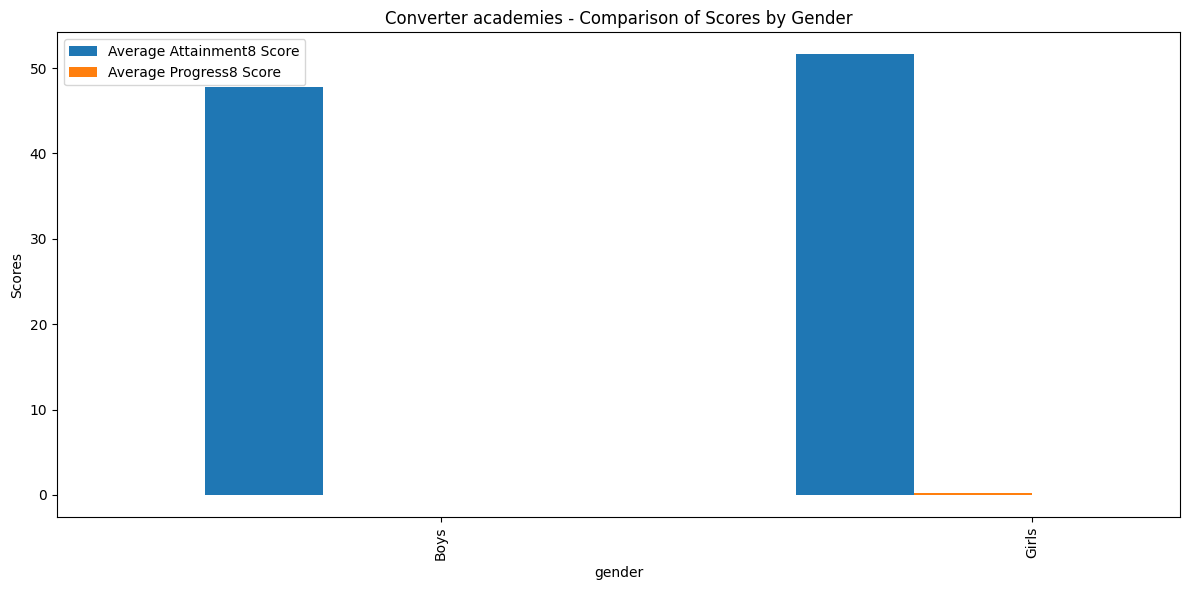

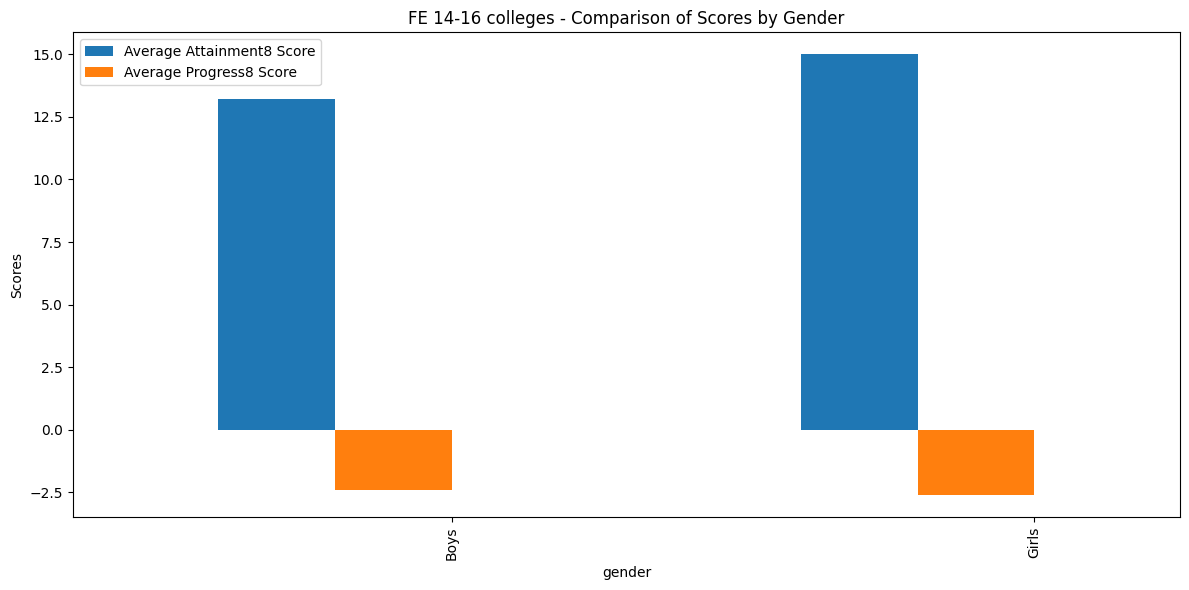

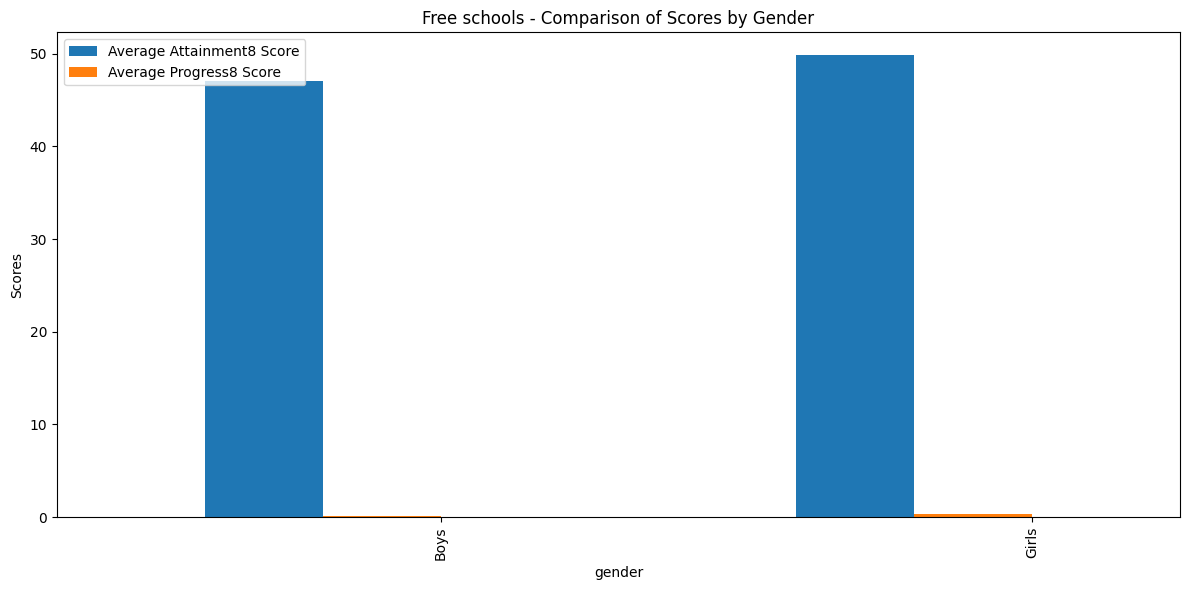

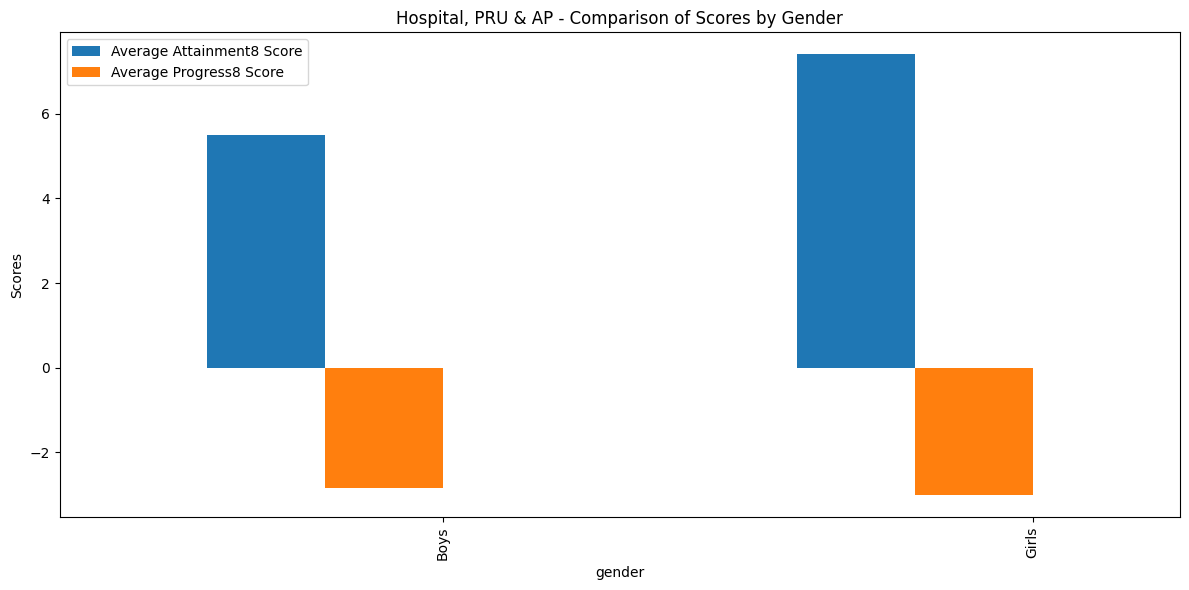

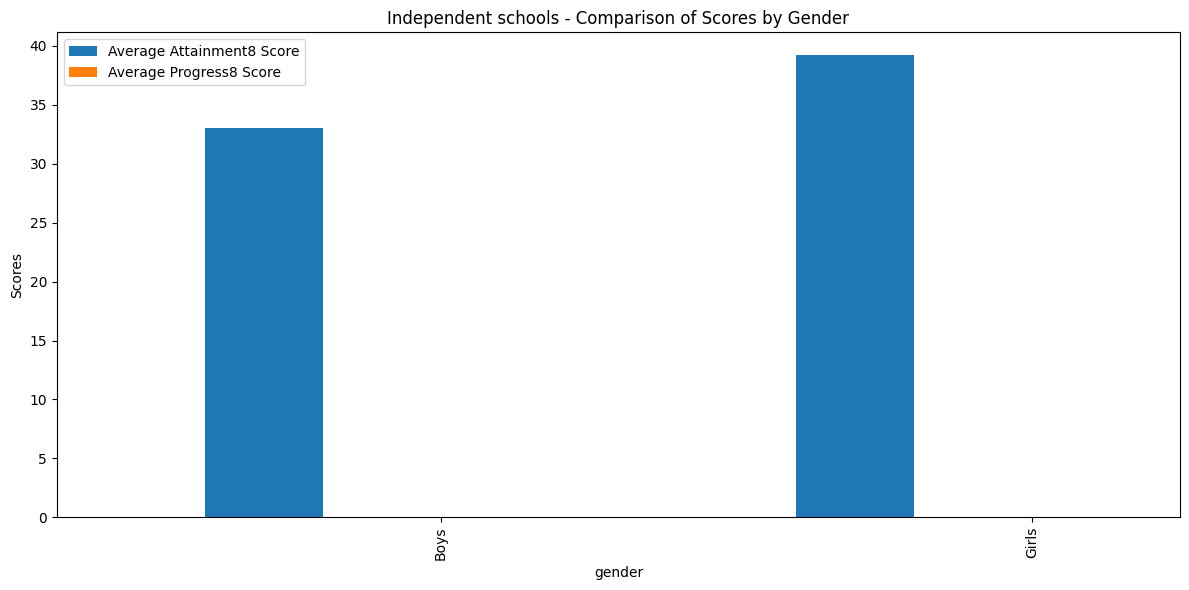

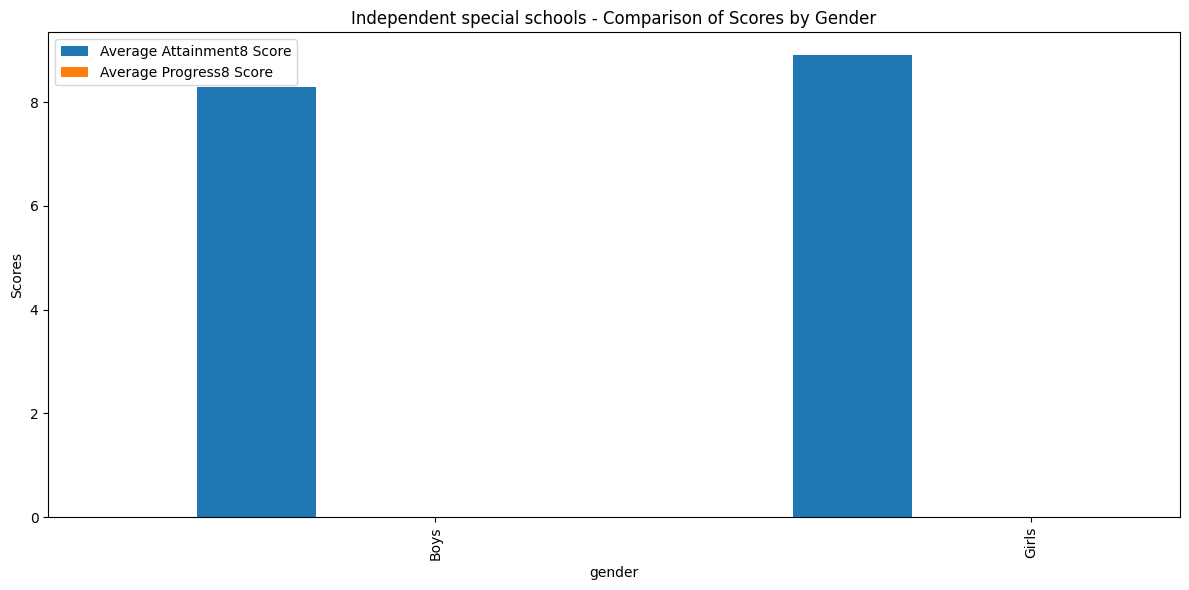

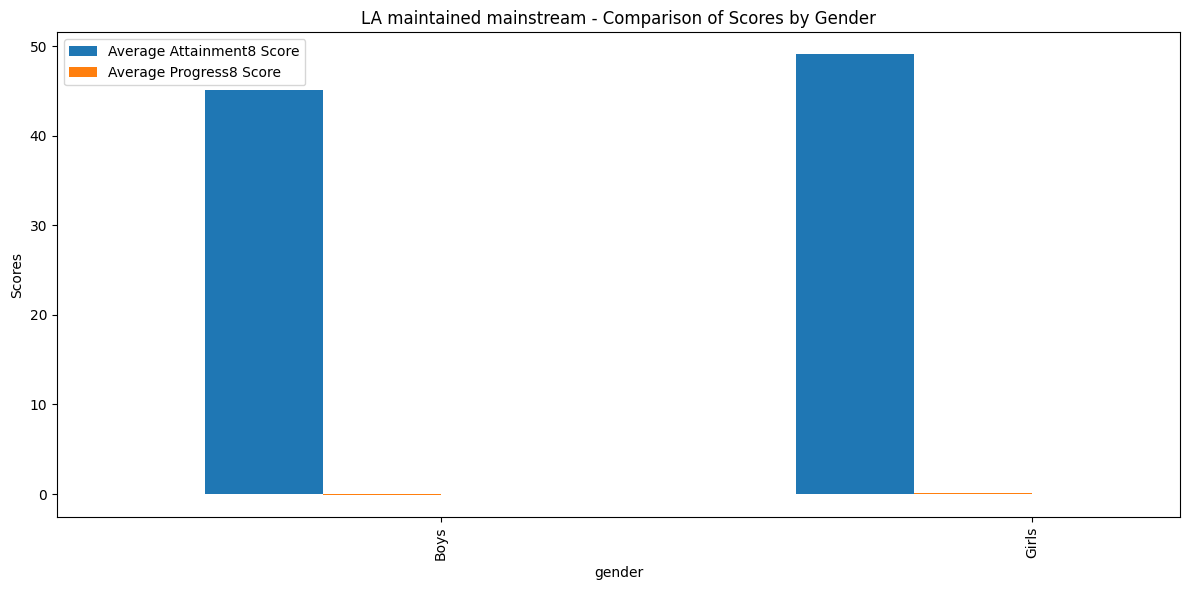

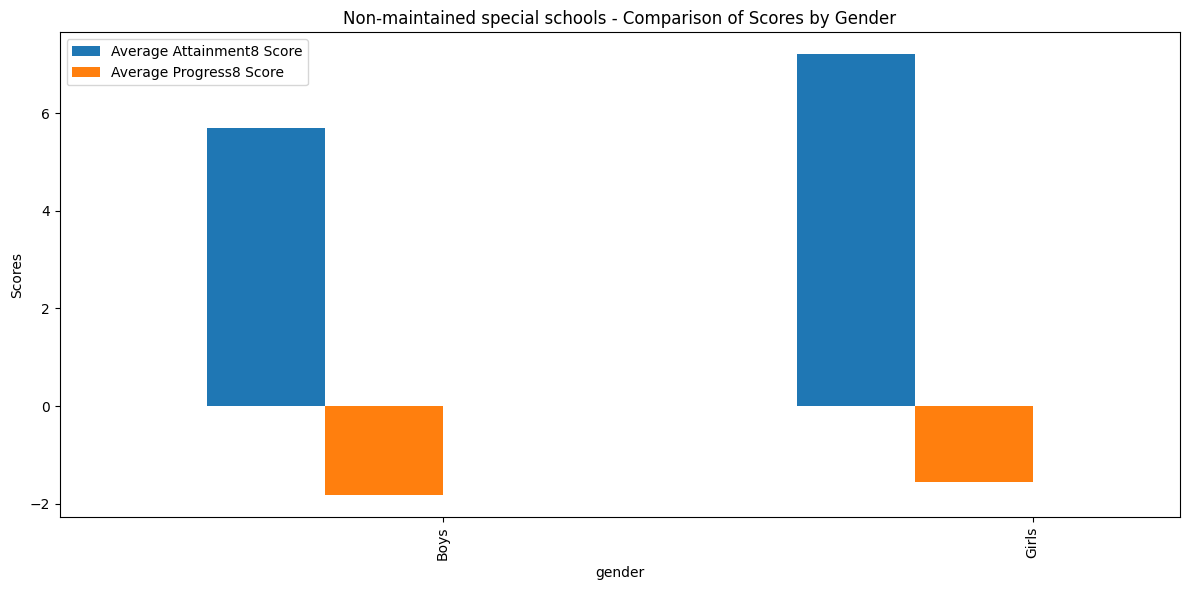

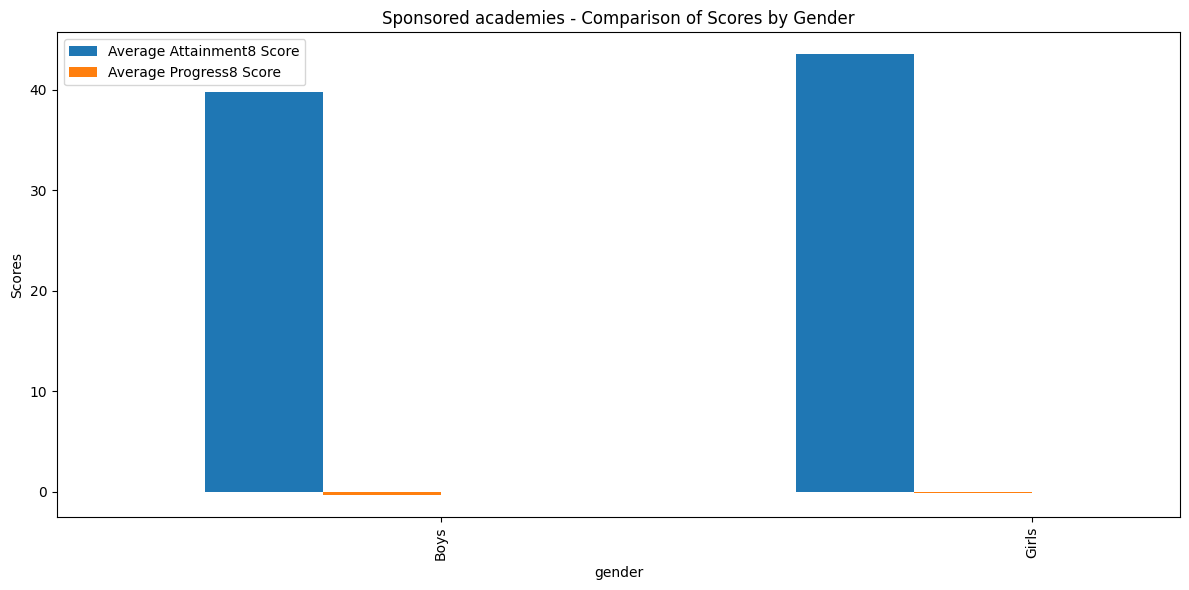

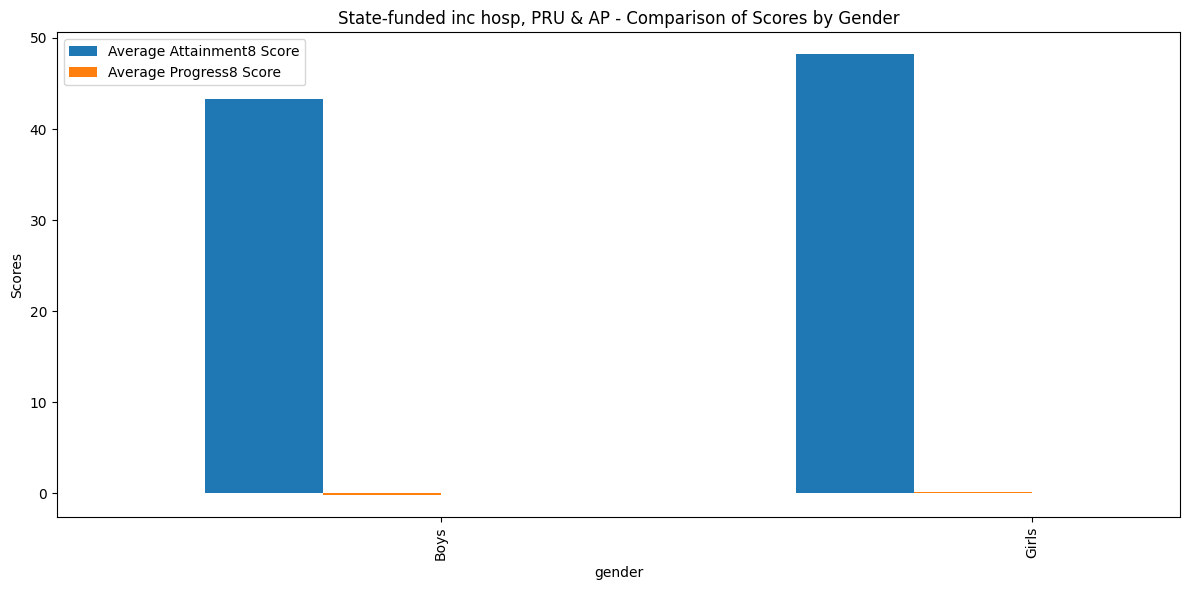

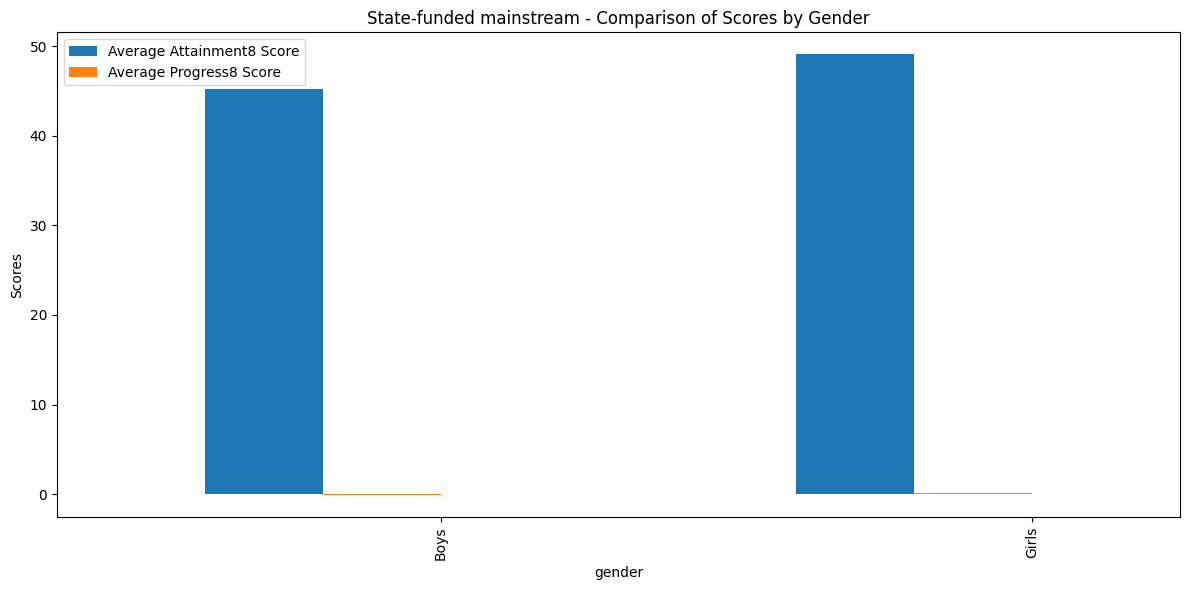

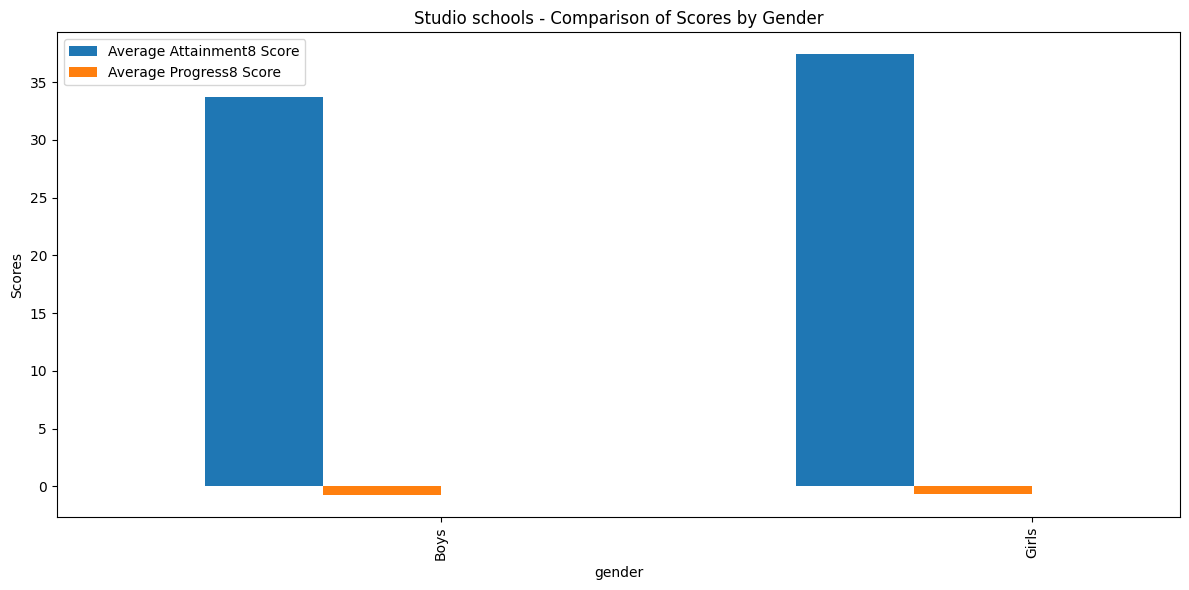

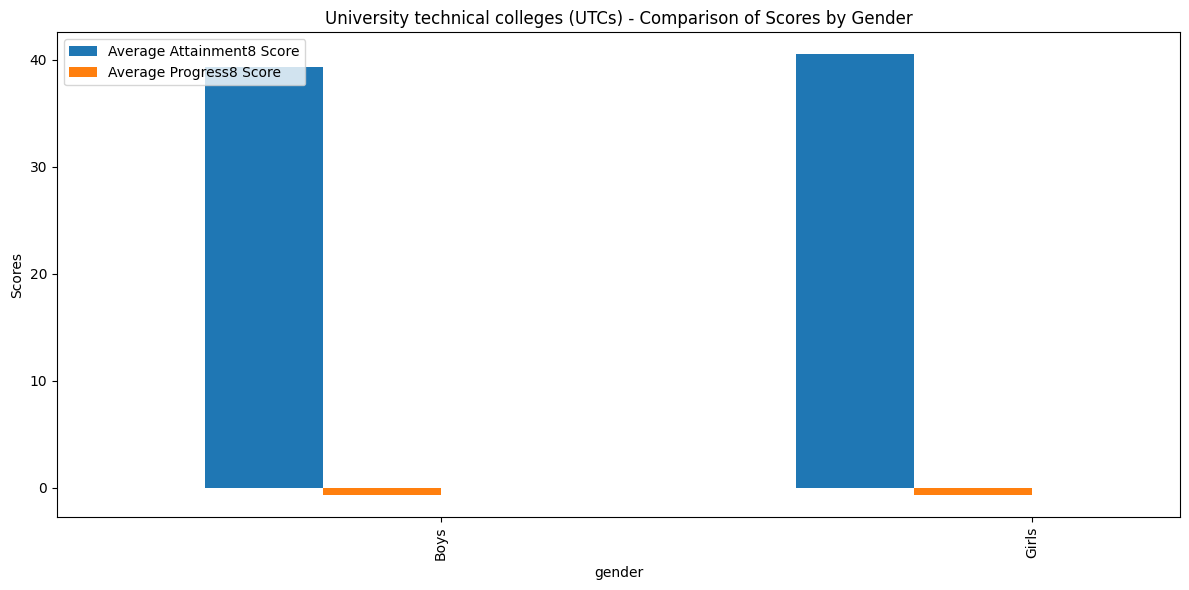

In [72]:
# Filter out 'Total' gender rows
df_gender = df[df['gender'] != 'Total']

# Iterate over each establishment type and create a single plot for both genders
establishment_types = df['establishment_type'].unique()

for est_type in establishment_types:
    est_type_data = df_gender[df_gender['establishment_type'] == est_type]
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

    # Plotting average Attainment8 Score, average Progress8 Score, and Percentage Achieving Grade 5-9
    est_type_data.plot(kind='bar', x='gender', y=['avg_attainment8_score', 'avg_progress8_score'],
                       ax=axes, width=0.4, position=1, align='center')

    axes.set_title(f'{est_type} - Comparison of Scores by Gender')
    axes.set_ylabel('Scores')
    axes.legend(["Average Attainment8 Score", "Average Progress8 Score"], loc='upper left')

    plt.tight_layout()
    plt.show()


# Comparing State-funded vs Private schools

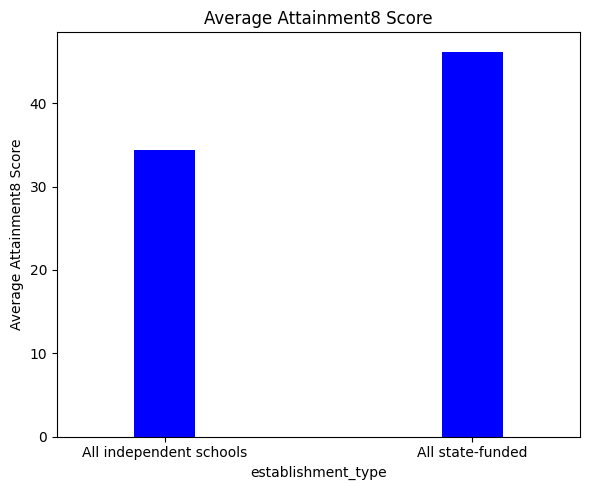

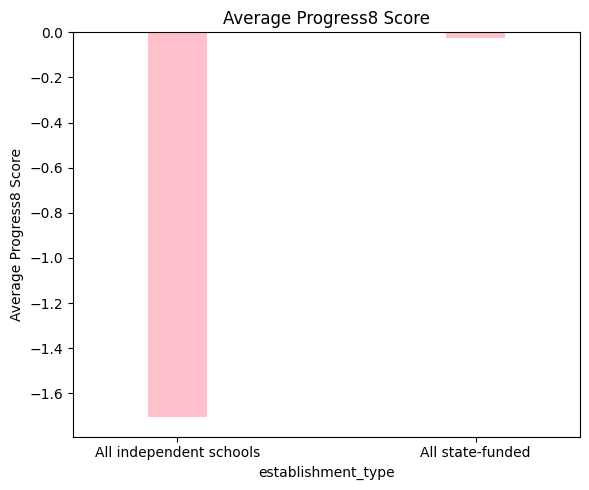

In [73]:
# Filter data for state and private schools
df_state_private = df[df['establishment_type'].isin(['All state-funded', 'All independent schools'])]

# Group by establishment type and calculate average scores
avg_scores = df_state_private.groupby(['establishment_type']).agg({
    'avg_attainment8_score': 'mean',
    'avg_progress8_score': 'mean'
}).reset_index()

# Plotting
fig1, ax1 = plt.subplots(figsize=(6, 5))
avg_scores.plot(kind='bar', x='establishment_type', y='avg_attainment8_score', width=0.2, ax=ax1, color='blue', legend=False, rot=0)
ax1.set_title('Average Attainment8 Score')
ax1.set_ylabel('Average Attainment8 Score')
plt.tight_layout()

fig2, ax2 = plt.subplots(figsize=(6, 5))
avg_scores.plot(kind='bar', x='establishment_type', y='avg_progress8_score', width=0.2, ax=ax2, color='pink', legend=False, rot=0)
ax2.set_title('Average Progress8 Score')
ax2.set_ylabel('Average Progress8 Score')
plt.tight_layout()

plt.show()
